# Book Recommendation System
##Mansi Upadhyay

**Problem Statement**: <br>
Design book recommendation system using collaboration filtering



### Importing Libraries

In [108]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

### Importing Dataset

In [109]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('/content/sample_data/ratings.csv')
b = pd.read_csv('/content/sample_data/books_enriched.csv')

### Data Understanding

### 1. Rating Dataset

Displaying 5 rows of data

In [110]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In **dataset r**, there are three columns, which are:
1. `user_id`: user identification number
2. `book_id`: book identification number
3. `rating`: rating given by `user_id`

In [111]:
r.shape

(5976479, 3)

In [112]:
for col in r.columns:
    print(f"Number of {col} is {r[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


There are 5,976,479 ratings given by 53,424 people on 10,000 books.

### 2. Books dataset

In [113]:
b.shape

(10000, 30)

It has 10000 rows and 30 columns. We want to display values in all columns, therefore we will transpose the table and only show first three rows.

In [114]:
b.head(3).T

,0,1,2
Unnamed: 0,0,1,2
index,0,1,2
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer']
average_rating,4.34,4.44,3.57
best_book_id,2767052,3,41865
book_id,1,2,3
books_count,272,491,226
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction..."
goodreads_book_id,2767052,3,41865


This dataset contains 30 columns. However, following further investigation, numerous columns are found to be repeated. For example, there are too many book_id columns, two title columns, two authors columns, information on the number of reviews per rating for each book, and so on. I'll undertake data preparation to create clearer data.




### Statistical summary

Let's look at the columns first before deciding which ones to use. To make things easier, I can divide the columns into numerical and categorical columns and then examine the statistics of the data.



In [115]:
#dividing the columns to numerical and categorical value
nums = b.select_dtypes(include=[np.number]).columns
cats = b.select_dtypes(exclude=[np.number]).columns

In [116]:
b[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044298883.46,442861920665.57,195170342.00,9780316192995.00,9780451528640.00,9780830777175.00,9790007672390.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


- There are numerous distinct columns, including 'Unnamed: 0', 'index', 'best_book_id', 'book_id', 'goodreads_book_id', 'isbn13', and 'work_id'. Because the field 'book_id' will be utilized to merge with the rating table, the other columns will be removed.
- The oldest book was written in the year -1750, which corresponds to 1750 BC.
- The 'average_rating' mean is 4.002 (very excellent!)
- I discovered an unusual amount of pages (0), and we discovered that a book should have at least 80 pages in order to be published. - The most popular book has 4,780,653 reviews, while the least popular has 2,716 reviews.


In [117]:
b[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


- The most popular author is Stephen King
- Selected Poems appears 4 times. We will have to see if its the same book
- We already have `original_publication_year`, so we can drop`publishDate`
- `authors`, `genres`, `publishDate`, and `authors_2` has unnecessary characters

Now, let's select numerical columns that are not unique value columns.

In [118]:
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages',
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count',
                    'work_ratings_count', 'work_text_reviews_count']

## Univariate Analysis

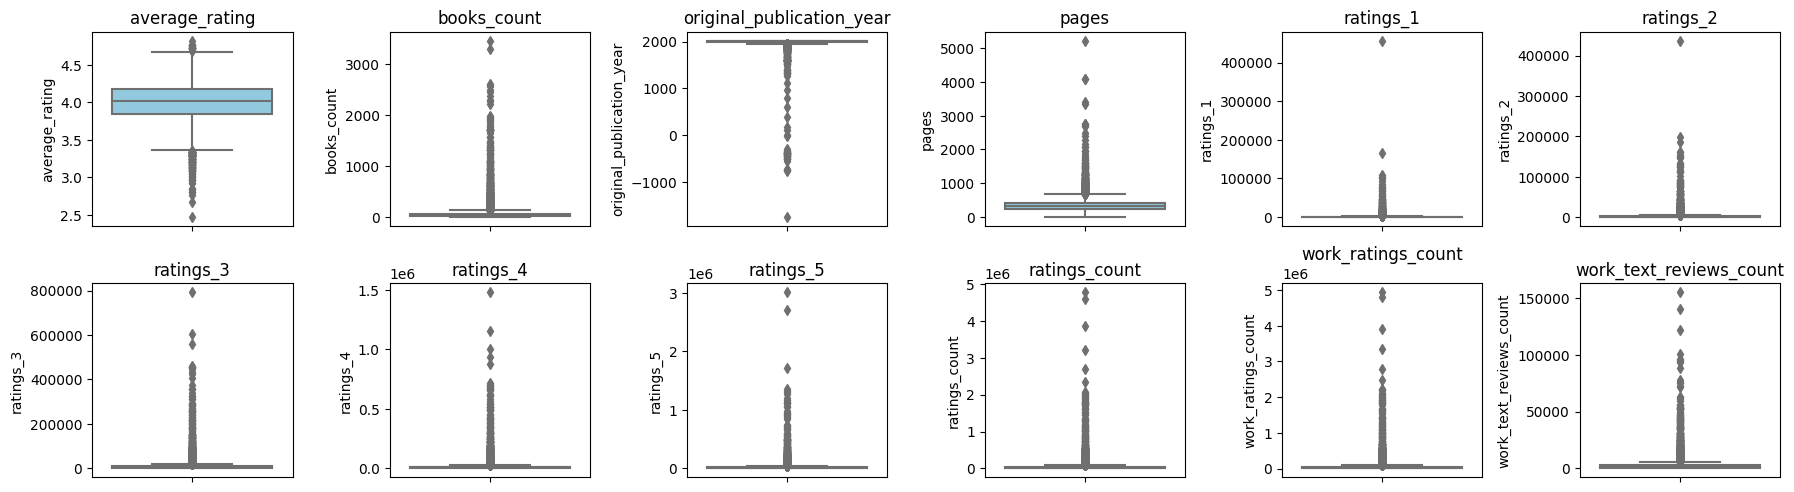

In [119]:
# adjust the figure size for better readability
plt.figure(figsize=(18, 10))

# plotting
features = not_unique_nums

# Check if the features exist in the DataFrame
valid_features = [feature for feature in features if feature in b.columns]

if not valid_features:
    print("No valid features to plot.")
else:
    # set the layout of the subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, feature in enumerate(valid_features):
        plt.subplot(4, 6, i+1)  # Adjust the number of rows and columns as needed
        sns.boxplot(y=b[feature], color='skyblue')
        plt.title(feature)  # add a title for each subplot

    # adjust layout after creating all subplots
    plt.tight_layout()

    # show the plots
    plt.show()







In [120]:
print("Valid Features:", valid_features)


Valid Features: ['average_rating', 'books_count', 'original_publication_year', 'pages', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count']


Because the data is so varied, there is no need to remove the outliers.


## Bivariate Analysis

checking the correlation between columns.

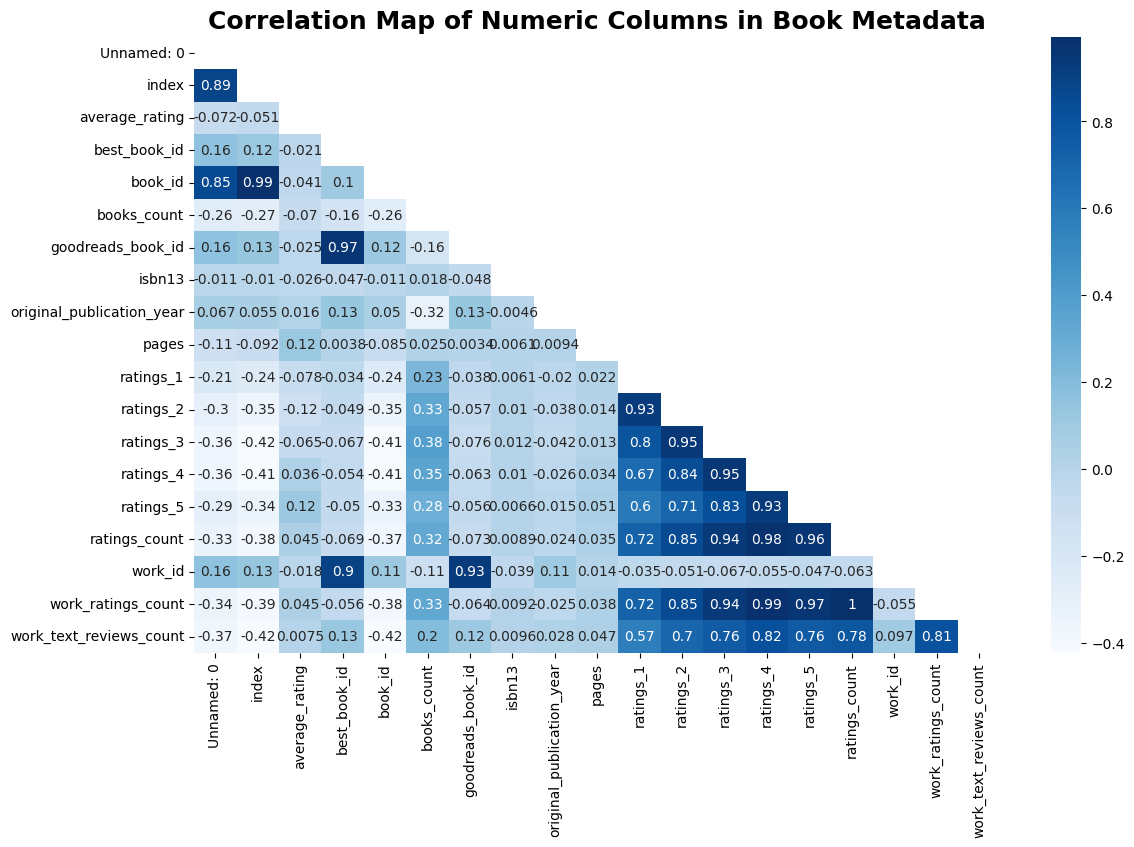

In [121]:
# Select only numeric columns from the DataFrame
numeric_columns = b.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation for numeric columns
corr = b[numeric_columns].corr()

# create heatmap
upper_triangle = np.triu(corr)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap="Blues", annot=True, mask=upper_triangle)
plt.title('Correlation Map of Numeric Columns in Book Metadata', weight='bold', fontsize=18)
plt.show()


- The ratings-related columns are multicollinear. We can also notice that higher ratings have a stronger relationship with 'work_ratings_count' and 'work_text_reviews_count'. People are more likely to leave reviews for books they enjoy. Only 'ratings_count' will be used.
- The relationship between 'original_publication_year' and 'books_count' is strong. It makes sense because the earlier book was most likely printed more and translated into more languages.



### Data Preprocessing

###Checking Missing Values and Duplicated Rows

In [122]:
#check missing value
dataset = [r, b]
for data in dataset:
    print(data.isnull().values.any())

False
True


In [123]:
#check duplicated rows
for data in dataset:
    print(data.duplicated().values.any())

False
False


There is no duplicate row in both dataset, but there is missing value in books data.

In [124]:
#make a copy
books = b.copy()

In [125]:
percent_missing = books.isnull().sum() * 100 / len(books)
missing_value = pd.DataFrame({'percent_missing': percent_missing}).sort_values(by=['percent_missing'], ascending=False)
missing_value = missing_value[missing_value['percent_missing'] > 0]  # You can adjust the threshold here
print(missing_value)


                           percent_missing
isbn                                  7.00
original_title                        5.85
isbn13                                5.85
pages                                 0.73
description                           0.57
original_publication_year             0.21
publishDate                           0.08


- Using 'publishDate' to infer 'original_publication_year', then removed 'publishDate'. I chose 'original_publication_year' since it has the same format as 'publishDate,' although 'publishDate' has different data formats.
- Replacing 'pages' with the median.
- Replacing 'description' with the title of the book.
- Removeing 'isbn', 'original_title', and 'isbn13'; these columns are unnecessary.



In [126]:
print(books.columns)



Index(['Unnamed: 0', 'index', 'authors', 'average_rating', 'best_book_id',
       'book_id', 'books_count', 'description', 'genres', 'goodreads_book_id',
       'image_url', 'isbn', 'isbn13', 'language_code',
       'original_publication_year', 'original_title', 'pages', 'publishDate',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'ratings_count', 'small_image_url', 'title', 'work_id',
       'work_ratings_count', 'work_text_reviews_count', 'authors_2'],
      dtype='object')


In [127]:
#comparing original_publication_year and publishdate when original_publication_year is null
books[books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]


,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


All invalid rows in 'original_publication_year' have the year in 'publishDate'. As a result, we can extract the year from 'publishDate' and assign it to 'original_publication_year'.


In [128]:
#get year from publishDate to original_publication_year
books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)
books['publishDate'] = books['publishDate'].str.extract('(\d{4})$').fillna('')
books['original_publication_year'] = books['original_publication_year'].fillna(books['publishDate'])
books['description'] = books['description'].fillna(books['title'])

In [129]:
#impute null in pages with median
books['pages'] = books['pages'].fillna(books['pages'].median())

In [130]:
#drop unnecessary columns with null
books = books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

In [131]:
#check missing value
books.isnull().values.any()

False

The preprocessing is done and now the data has no missing values.

### Feature Engineering

In [132]:
#keep important columns, drop the rest
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'genres', 'average_rating', 'ratings_count', 'books_count']
books = books[cols_to_keep]

checking the value in each columns in order to find any strange characters.

In [133]:
#display max column
with pd.option_context('display.max_colwidth', None):
    display(books.head(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.00,374.00,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.00,309.00,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.00,501.00,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.00,324.00,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American l

In the top 5 entry, I found unnecessary characters that are not supposed to be in `description` column. We need to get rid of those extraneous characters if we want to find related novels faster. It takes time to go through it one by one, but we did our best to collect all unneeded characters and guess the rest. Then i will remove the unneeded characters and lowercase all fonts.



In [134]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
books['description'] = books['description'].str.lower()

In [135]:
#rename column and change year, pages, and book_count to integer
books.rename(columns = {'original_publication_year':'year'}, inplace = True)
books[['year', 'pages', 'books_count']] = books[['year', 'pages', 'books_count']].astype(int)


Getting10 samples to check there are no unnecessary characters anymore

In [136]:
with pd.option_context('display.max_colwidth', None):
    display(books.sample(10))

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
2385,2553,"The Lost World (Professor Challenger, #1)",Arthur Conan Doyle,1912,272,its london 1907 journalist edward malone rejected by the woman he loves because he is too prosaic decides to go in search of adventure and fame to prove himself worthy of her soon after he meets professor george challenger a scientist who claims to have discovered a lost world populated by pterodactyls and other prehistoric monsters,"classics, sciencefiction, fiction, fantasy, mystery",3.92,39169,727
2573,2759,"A Living Nightmare (Cirque Du Freak, #1)",Darren Shan,2000,272,in the tradition of stephen kings salems lot cirque du freak is the frightening saga of a young boy whose visit to a mysterious freak show leads him on a journey into a dark world of vampires filled with grotesque creatures murderous vampires and a petrifying ending cirque du freak will chill thrill and leave readers begging for more,"fantasy, youngadult, horror, paranormal, fiction",4.07,38753,86
732,782,The Awakening,Kate Chopin,1899,195,when first published in 1899 the awakening shocked readers with its honest treatment of female marital infidelity audiences accustomed to the pieties of late victorian romantic fiction were taken aback by chopins daring portrayal of a woman trapped in a stifling marriage who seeks and finds passionate physical love outside the confines of her domestic situationaside from its unusually frank treatment of a thencontroversial subject the novel is widely admired today for its literary qualities edmund wilson characterized it as a work quite uninhibited and beautifully written which anticipates d h lawrence in its treatment of infidelity although the theme of marital infidelity no longer shocks few novels have plumbed the psychology of a woman involved in an illicit relationship with the perception artistry and honesty that kate chopin brought to the awakening,"classics, fiction, historicalfiction",3.63,125474,452
3363,3639,"The 101 Dalmatians (The Hundred and One Dalmatians, #1)","Dodie Smith, Michael Dooling",1956,184,pongo and missis had a lovely life with their human owners the dearlys to look after them they lived in a comfortable home in london with their 15 adorable dalmatian puppies loved and admired by all especially the dearlys neighbor cruella de vil a furfancying fashion plate with designs on the dalmatians spotted coats! so when the puppies are stolen from the dearly home and even scotland yard is unable to find them pongo and missis know they must take matters into their own paws! the delightful childrens classic adapted twice for popular disney productions ages 811,"classics, fiction, fantasy, youngadult",4.11,27717,89
9537,8654,Gentlemen of the Road,"Michael Chabon, Gary Gianni",2007,204,two wandering adventurers and unlikely soulmates are variously plying their trades as swords for hire horse thieves and con artists until fortune entangles them in the myriad schemes and battles that follow a bloody coup in the medieval jewish empire of the khazars,"fiction, historicalfiction, fantasy, history, contemporary, travel, books",3.42,10440,36
8259,1548,"Frog and Toad Are Friends (Frog and Toad, #1)",Arnold Lobel,1970,64,celebrate the power of friendship in these five adventurous stories starring frog and toada caldecott honor book!from writing letters to going swimming telling stories to finding lost buttons frog and toad are always there for each otherjust as best friends should be frog and toad are friends is a level two i can read book geared for kids who read on their own but still need a little helpthe classic frog and toad stories by arnold lobel have won numerous awards and honors including a newbery honor frog and toad together a caldecott honor frog and toad are friends ala notable children’s book fanfare honor list the horn book school library journal best children’s book and library of congress children’s book,"fiction, classics, fant

# EDA

### Distribution of books based on ratings

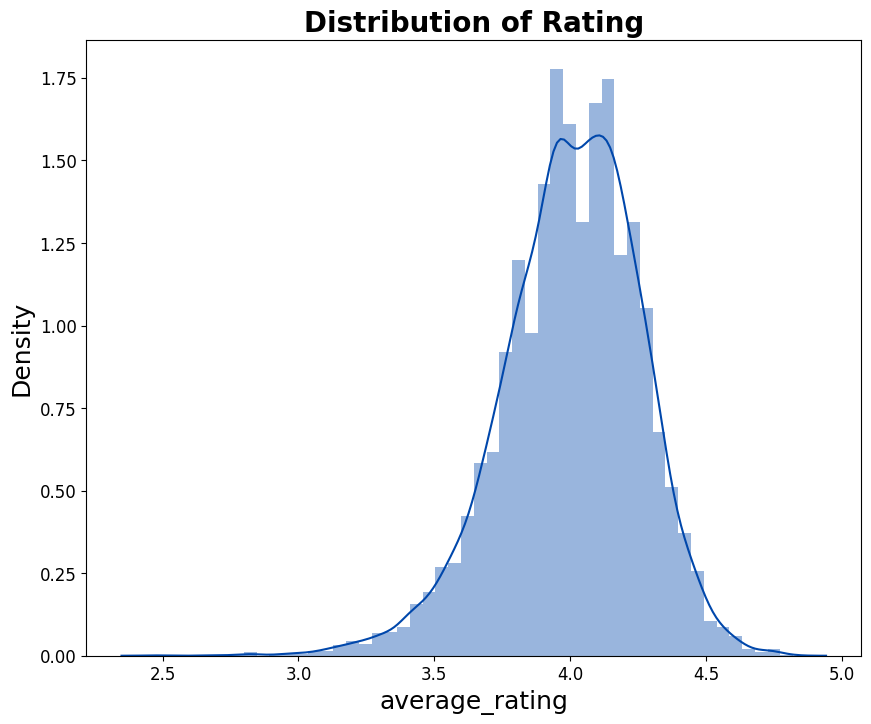

In [137]:
#Rating distribution based on books metadata
plt.figure(figsize=(10,8))
sns.distplot(books['average_rating'], color = '#0047AB')
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('average_rating', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [138]:
books.describe()

,book_id,year,pages,average_rating,ratings_count,books_count
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1982.04,359.25,4.00,54001.24,75.71
std,2886.90,152.42,216.17,0.25,157369.96,170.47
min,1.00,-1750.00,0.00,2.47,2716.00,1.00
25%,2500.75,1990.00,251.00,3.85,13568.75,23.00
50%,5000.50,2004.00,336.00,4.02,21155.50,40.00
75%,7500.25,2011.00,422.00,4.18,41053.50,67.00
max,10000.00,2017.00,5216.00,4.82,4780653.00,3455.00


Since this is a list of 10,000 popular books, we admit the fact that the majority of the books are good books with an average value of 4.

###Rating distribution based on rating dataset

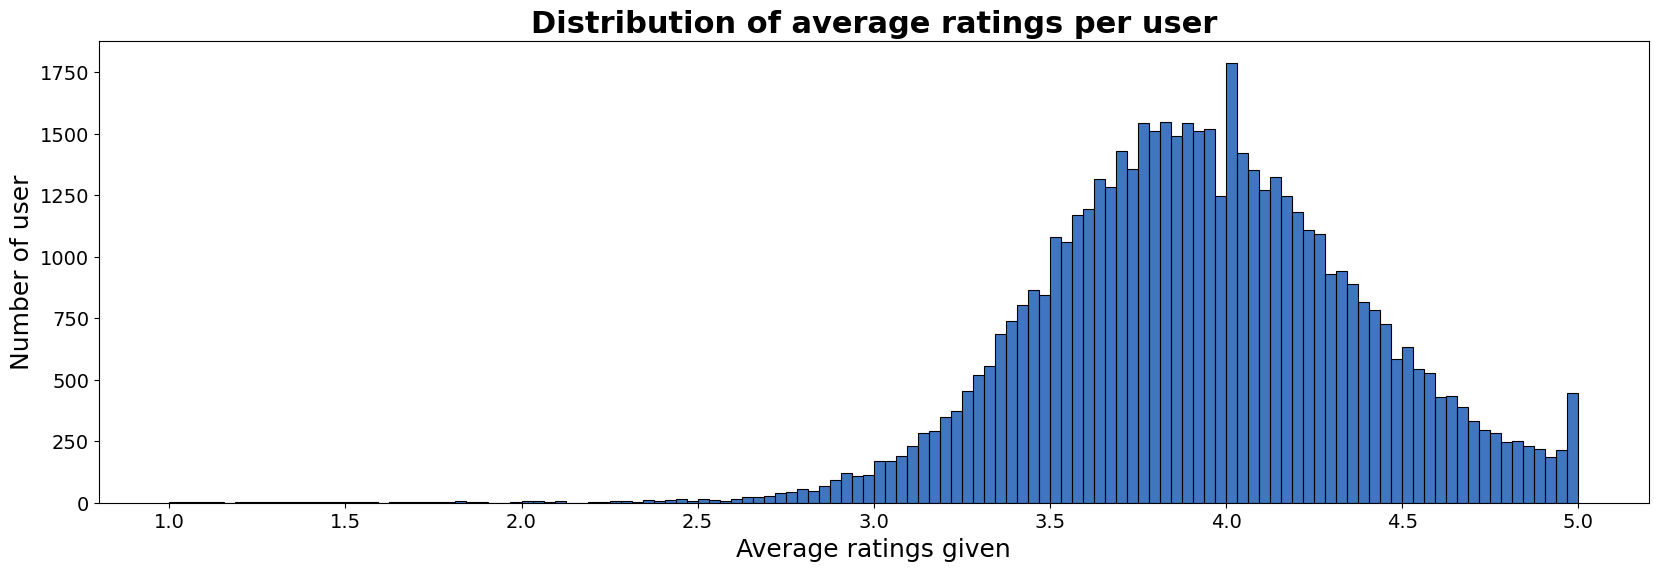

In [139]:


# average rating per user
av_rating_user = r.groupby('user_id')['rating'].mean().reset_index()

#jumlah rating per buku
plt.figure(figsize=(20,6))
sns.histplot(data=av_rating_user, x='rating', color='#0047AB')
plt.title('Distribution of average ratings per user', weight='bold', fontsize=22)
plt.xlabel('Average ratings given', fontsize=18)
plt.ylabel('Number of user', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

There are few low ratings, and the peak seems to be at 4.

###Checking the number of rating  a book usually gets

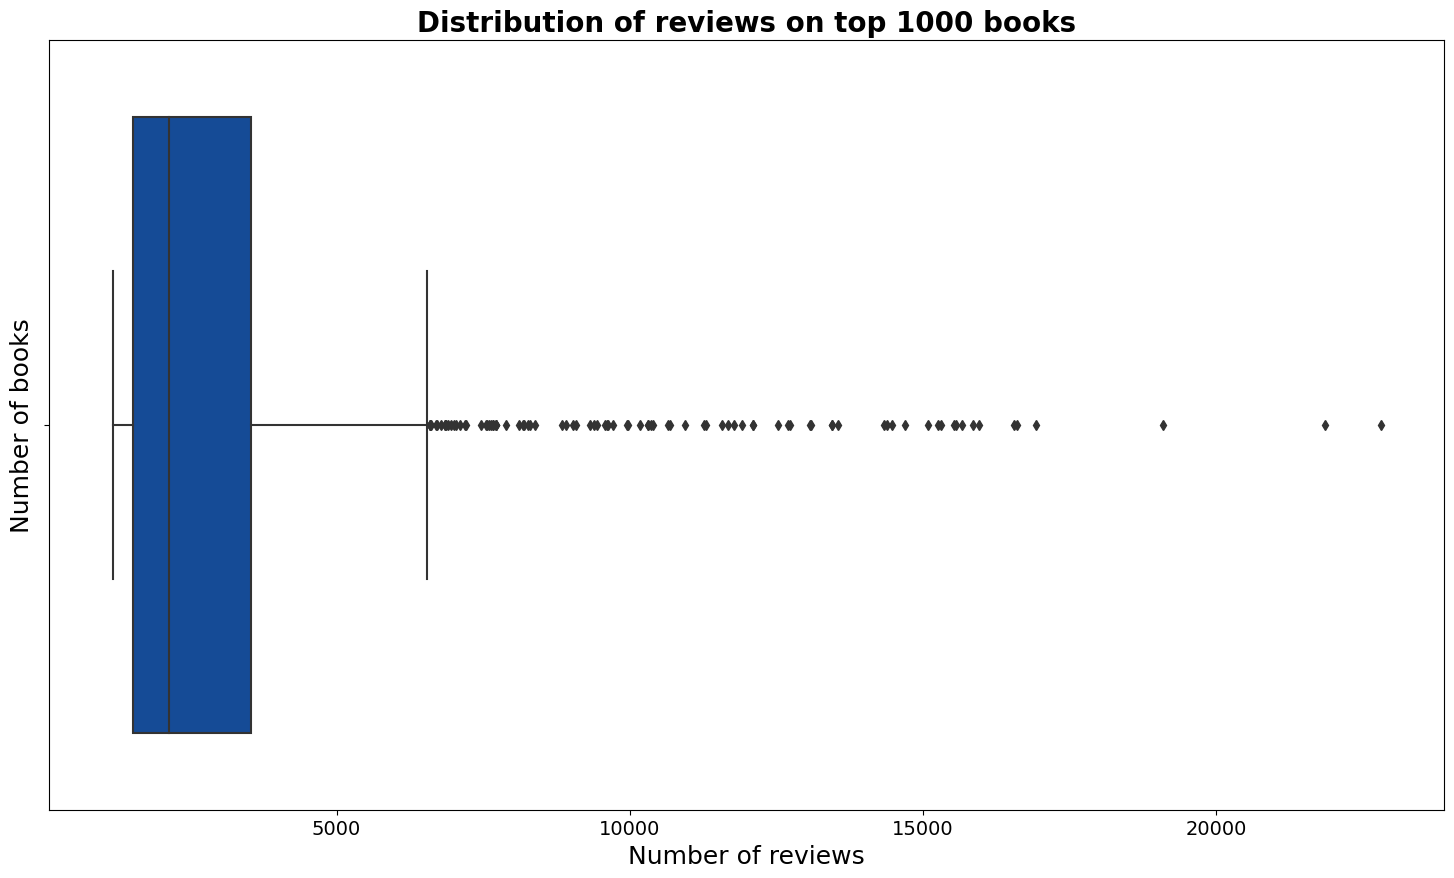

In [140]:
# ratings per book
ratings_per_book = (r.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating', ascending=False)

#visualize
plt.figure(figsize=(18,10))
sns.boxplot(data=ratings_per_book.head(1000), x='rating', color = '#0047AB')
plt.title('Distribution of reviews on top 1000 books', weight='bold', fontsize=20)
plt.xlabel('Number of reviews', fontsize=18)
plt.ylabel('Number of books', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

The distribution of reviews on books is positively skewed.

There are more books that has less ratings. Let's check the number of rating distribution.

In [141]:
ratings_per_book['rating'].describe()

count   10000.00
mean      597.65
std      1267.29
min         8.00
25%       155.00
50%       248.00
75%       503.00
max     22806.00
Name: rating, dtype: float64

Books in this database have at least 8 reviews, while popular books have 22,806 reviews. The gap is too large.

Checking the outliers now.

In [142]:
q3, q1 = np.percentile(ratings_per_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(ratings_per_book[ratings_per_book['rating'] > maximum])
print(f'We have {outlier_books} books that are considered outlier, because they have more than {int(maximum)} number of ratings')

We have 26 books that are considered outlier, because they have more than 12515 number of ratings


Deleting the outliers, will affect the data variety. So ill not delete them.

###Number of  ratings usually given by a user

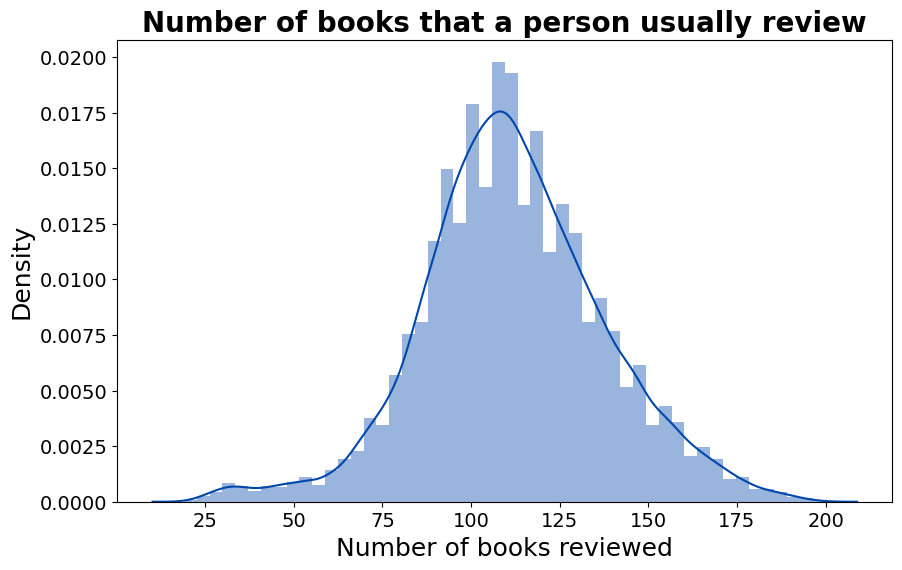

In [143]:
#agregate ratings by user
book_per_user = r.groupby('user_id')['rating'].count().reset_index()

#visualize
plt.figure(figsize=(10,6))
sns.distplot(book_per_user['rating'], color='#0047AB')
plt.title('Number of books that a person usually review', weight='bold', fontsize=20)
plt.xlabel('Number of books reviewed', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [144]:
book_per_user['rating'].describe()

count   53424.00
mean      111.87
std        26.07
min        19.00
25%        96.00
50%       111.00
75%       128.00
max       200.00
Name: rating, dtype: float64

Most people read at least 19 books and evaluate 200 novels. The typical individual reviews 111 books.
Even the user with the greatest number of reviews managed to rate only 2% of all the books in our sample of 10,000.

 Because the data in the user is quite scarce, item-based collaborative filtering is preferable.


In [145]:
book_per_user[book_per_user['rating'] == book_per_user['rating'].max()]['user_id'].values

array([12874, 30944])

We will look into the book recommendation for one of the users mentioned above later.



###Does the ratings count affect average rating

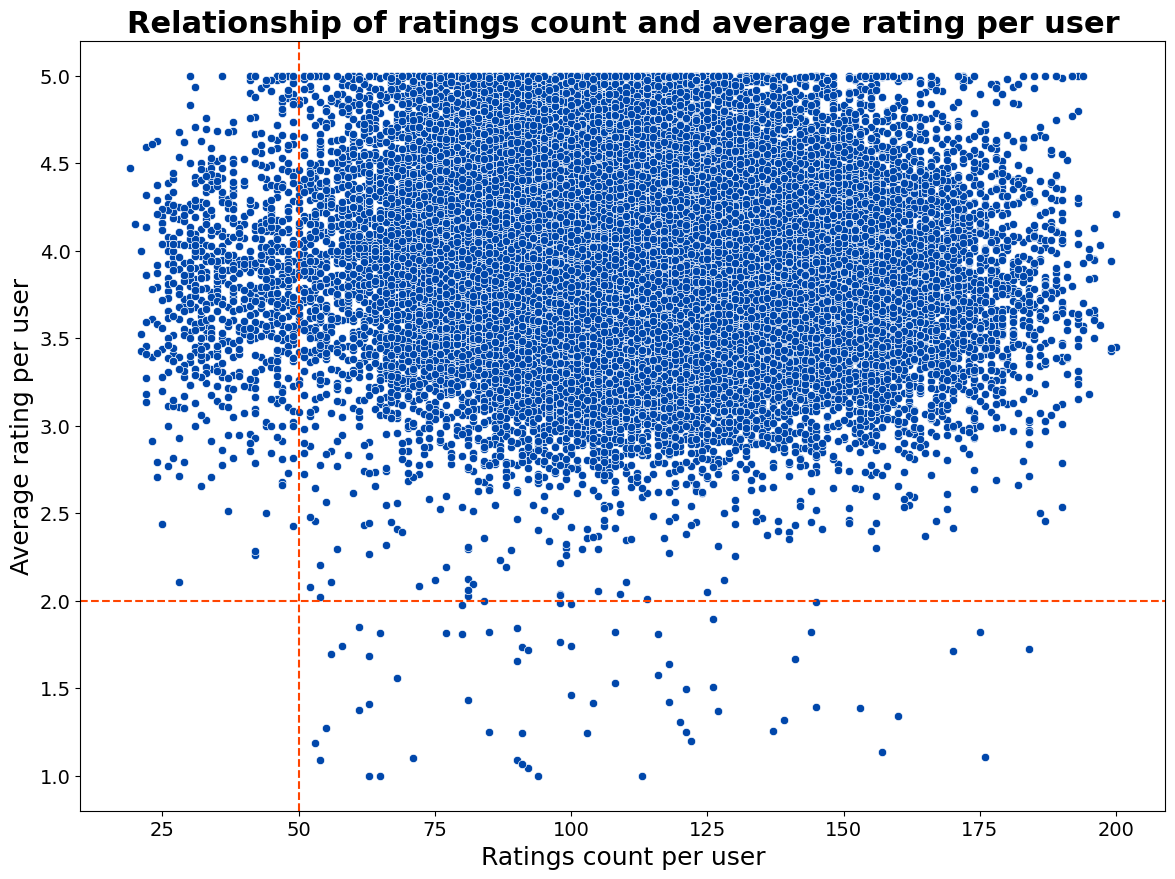

In [146]:
# merge average rating and number of ratings for each sampeld individual
id_merged = av_rating_user.merge(book_per_user, left_on="user_id", right_on="user_id")

#visualize
plt.figure(figsize=(14,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Relationship of ratings count and average rating per user', weight='bold', fontsize=22)
plt.xlabel('Ratings count per user', fontsize=18)
plt.ylabel('Average rating per user', fontsize=18)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- People who rate < 50 books tend to give higher ratings.
- People start to give lower rating if they read more books.
- This could be a result of an inappropriate book recommendation system, so that people end up reading books they don't like.

###Book having the higher rating

In [147]:
#Books with highest ratings
book_sorted_ratings = books.sort_values('average_rating', ascending=False)
book_sorted_ratings.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
3353,3628,The Complete Calvin and Hobbes,Bill Watterson,2005,1456,box set book one book two book three c...,"comics, graphicnovels, fiction, classics",4.82,28900,14
3043,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",2003,2690,box set containing harry potter and the sorcer...,"fantasy, youngadult, fiction, classics",4.77,33220,11
810,862,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014,1087,words of radiance book two of the stormlight a...,"fantasy, fiction",4.77,73572,34
6779,7947,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002,2750,the esv study bible was designed to help you u...,"christian, nonfiction, religion, classics, his...",4.76,8953,96
7403,8854,Mark of the Lion Trilogy,Francine Rivers,1993,1468,this bestselling trilogy chronicles a tale of ...,"christian, historicalfiction, fiction, romance...",4.76,9081,6
4068,4483,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996,176,when cartoonist bill watterson announced that ...,"comics, graphicnovels, fiction",4.75,22351,21
387,422,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998,4100,over 4000 pages of harry potter and his world ...,"fantasy, youngadult, fiction, classics",4.74,190050,76
5593,6361,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996,176,in the world that calvin and his stuffed tiger...,"comics, fiction, graphicnovels",4.74,16766,22
5767,6590,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,1990,254,a collection of calvin and hobbes cartoons the...,"comics, graphicnovels, fiction, classics",4.73,16087,21
3457,3753,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005,3342,six years of magic adventure and mystery make ...,"fantasy, fiction, youngadult, classics",4.73,24618,6


In [148]:
#(Books with most reviews)
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,374,winning means fame and fortunelosing means cer...,"youngadult, fiction, fantasy, sciencefiction, ...",4.34,4780653,272
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997,309,harry potters life is miserable his parents ar...,"fantasy, fiction, youngadult, classics",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",Stephenie Meyer,2005,501,about three things i was absolutely positive ...,"youngadult, fantasy, romance, fiction, paranormal",3.57,3866839,226
3,4,To Kill a Mockingbird,Harper Lee,1960,324,the unforgettable novel of a childhood in a sl...,"classics, fiction, historicalfiction, youngadult",4.25,3198671,487
4,5,The Great Gatsby,F. Scott Fitzgerald,1925,200,alternate cover edition isbn isbn13 the great...,"classics, fiction, historicalfiction, romance",3.89,2683664,1356
5,6,The Fault in Our Stars,John Green,2012,313,despite the tumorshrinking medical miracle tha...,"youngadult, romance, fiction, contemporary",4.26,2346404,226
6,7,The Hobbit,J.R.R. Tolkien,1937,366,in a hole in the ground there lived a hobbit n...,"fantasy, classics, fiction, youngadult",4.25,2071616,969
7,8,The Catcher in the Rye,J.D. Salinger,1951,277,the heronarrator of the catcher in the rye is ...,"classics, fiction, youngadult",3.79,2044241,360
9,10,Pride and Prejudice,Jane Austen,1813,279,alternate cover edition of isbn since its imme...,"classics, fiction, romance, historicalfiction",4.24,2035490,3455
8,9,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2000,736,worldrenowned harvard symbologist robert langd...,"fiction, mystery, thriller, suspense, crime, h...",3.85,2001311,311


- When I sorted book based on `ratings_count`, I found several books have an `average_rating` lower than the mean (less than 4.002)
- When I sorted book based on `average_rating`, I found several books have lower number of reviews (`ratings_count`).
- Therefore we should make a new score calculation that also takes into account the `average_rating` and `ratings_count`.

### Anlayzing relationship between the number of ratings and the average rating

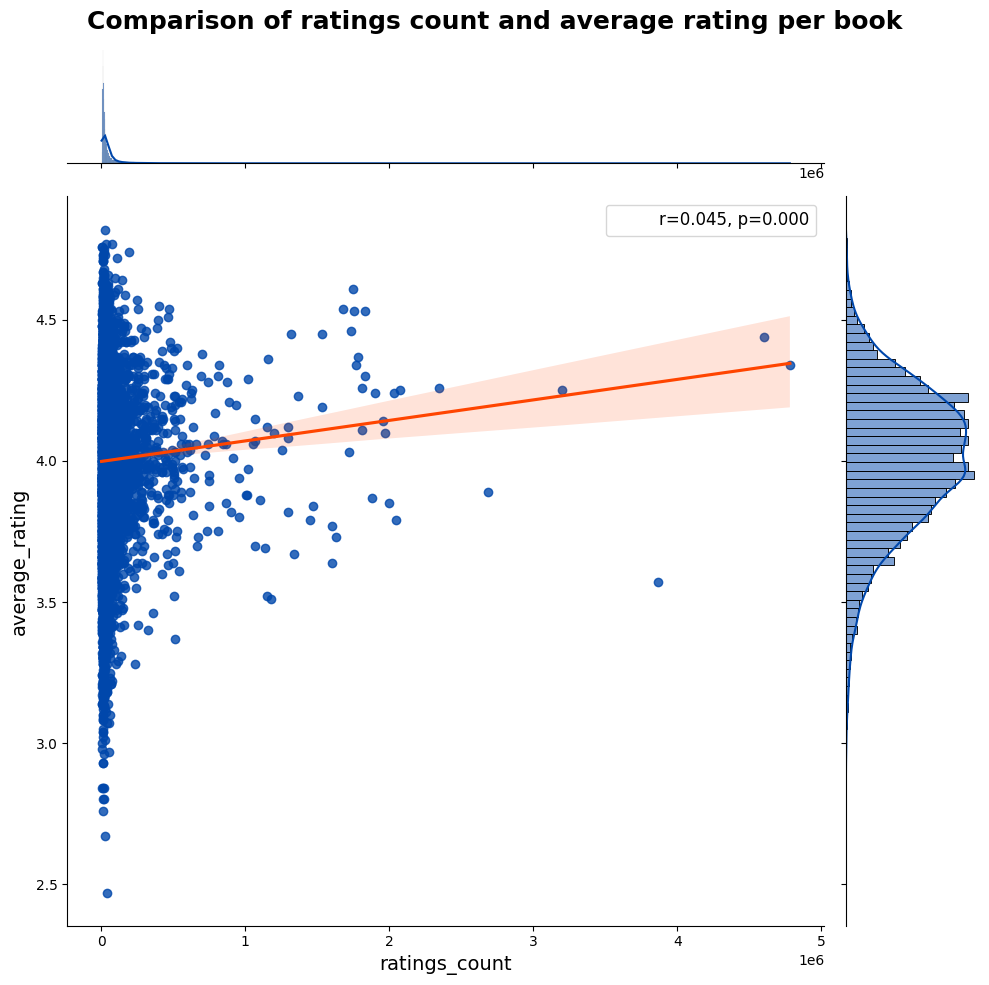

In [149]:
j = sns.jointplot(data=books, x='ratings_count', y='average_rating',
                  height=10, kind='reg', color='#0047AB', line_kws={'color':'orangered'})

r, p = stats.pearsonr(books['ratings_count'], books['average_rating'])

phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)], fontsize=12)

j.fig.suptitle('Comparison of ratings count and average rating per book', weight='bold', fontsize=18)
j.set_axis_labels('ratings_count', 'average_rating', fontsize=14)

# labels appear outside of the plot area, so auto-adjust
j.figure.tight_layout()

plt.show()


A book that is popular (has lots of ratings) is more likely to get a good rating. However, if we look at our data, the correlation between `average_rating` and `ratings_count` is not too big, which means that many popular books have low ratings.

### Author with the most number of books

In [150]:
#First try with the simple count
author_book_count = books.groupby('authors')['title'].count().sort_values(ascending = False)
author_book_count.head()

authors
Stephen King       60
Nora Roberts       59
Dean Koontz        46
Terry Pratchett    42
Agatha Christie    39
Name: title, dtype: int64

Stephen King is the author with the most novels, according to a simple count.


Let's look at some works authored by more than one author.


In [151]:
#take 'Stephen King' as an example
auth = []
books.authors.apply(lambda x: auth.append(x) if 'Stephen King' in x else [])
auth[:5]

['Stephen King',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King']

Actually, some books have been authored by multiple authors. These books are not included in the author's total number of books! To keep things simple, I chose only the first author.


In [152]:
prev_count = books.authors.value_counts()['Stephen King']
print(f'Number of books written by Stephen King was {len(auth)} not {prev_count}.')

Number of books written by Stephen King was 97 not 60.


In [153]:
#split authors in each books
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:5]

['J.K. Rowling, Mary GrandPré',
 'Anne Frank, Eleanor Roosevelt, B.M. MooyaartDoubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré']

In [154]:
#insert splitted author list in every row
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [155]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [156]:
#remove previous author column and join the new splitted authors
books = books.drop('authors', axis=1).join(splitted_authors)

In [157]:
# Take the first author for each book and remove the rest
books = books.drop_duplicates(subset='book_id', keep='first')

In [158]:
#author with most books
book_count_real = books['authors'].value_counts()
book_count_real.head()

James Patterson    96
Stephen King       80
Nora Roberts       63
Dean Koontz        51
Terry Pratchett    48
Name: authors, dtype: int64

Now, instead of Stephen King, we found James Patterson is actually the author with the most books!

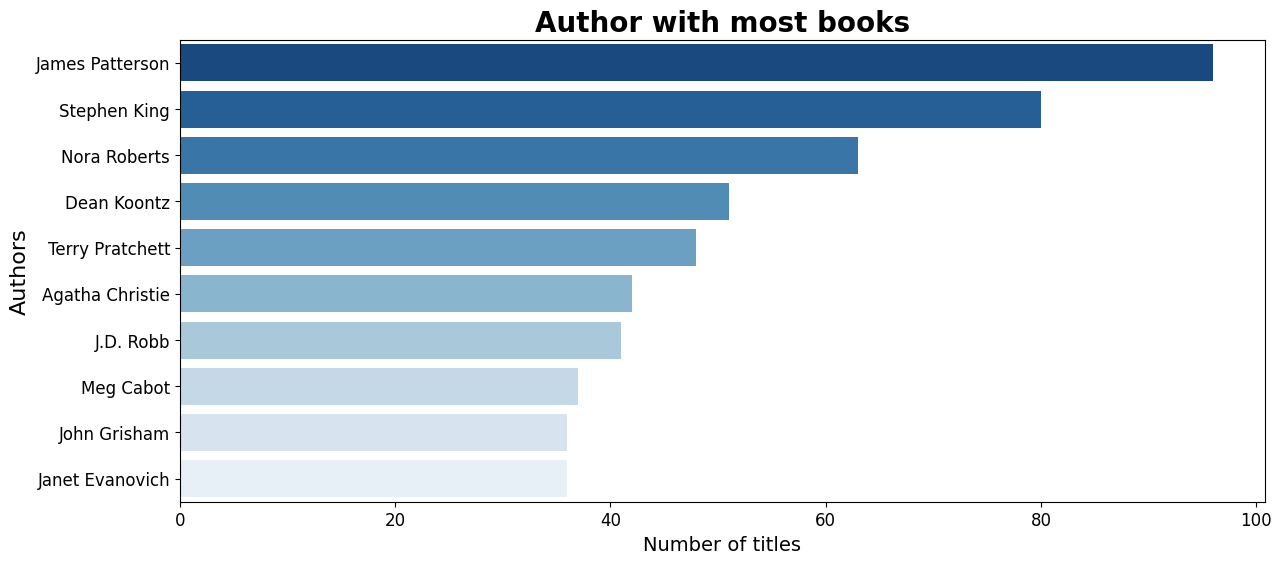

In [159]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values,
            y=book_count_real.head(10).index,
           palette = 'Blues_r')
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Who is the most popular author?

In [160]:
# Let's check authors with most ratings_count
popular_author = books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)

authors
J.K. Rowling       16036005
Suzanne Collins     8646393
Stephenie Meyer     8512437
Stephen King        8250167
J.R.R. Tolkien      5454844
Name: ratings_count, dtype: int64

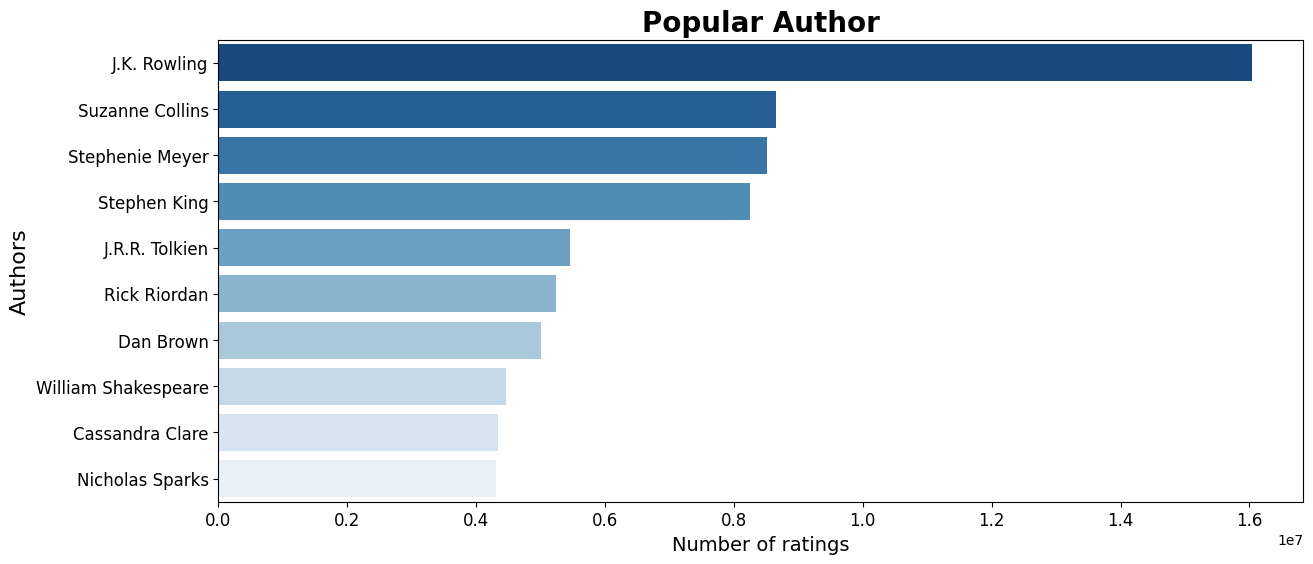

In [161]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values,
            y=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Even though James Patterson is the author with the most books, he is not the one who has the most ratings. We have J.K Rowling as the most ratings author with her 20 books in this dataset.

### Which author has good book ratings

In [162]:
# Let's check authors with biggest number of rates (total number for all books)
high_rating_author = books.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

authors
Bill Watterson     4.70
Hafez              4.63
James E. Talmage   4.63
Eiichiro Oda       4.63
Angie Thomas       4.62
Name: average_rating, dtype: float64

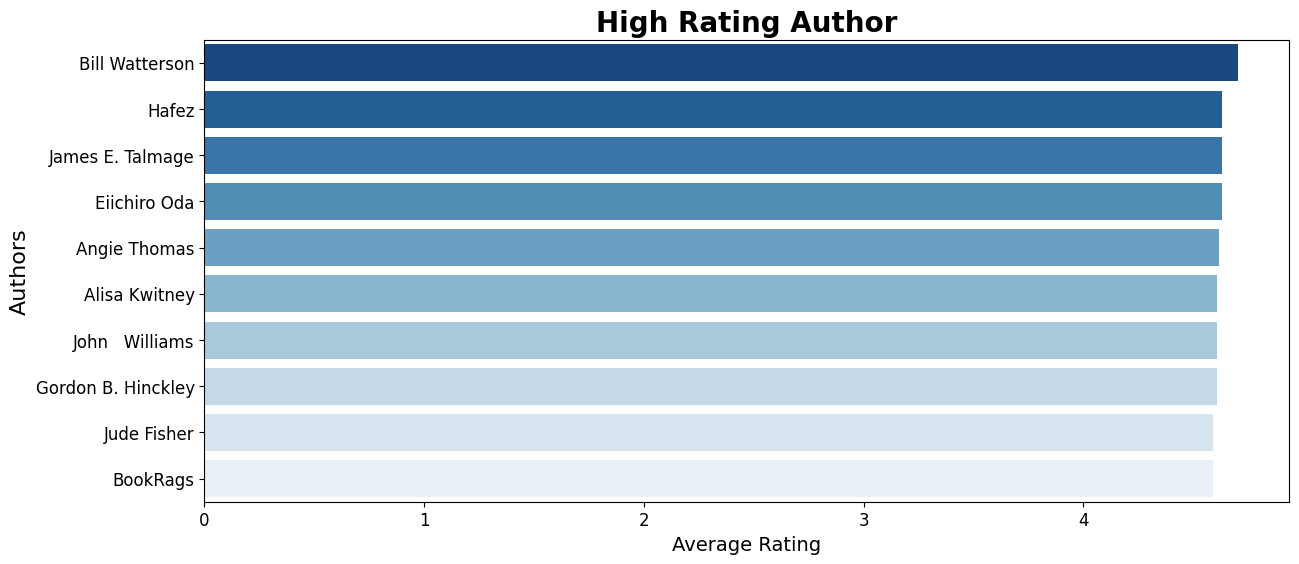

In [163]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=high_rating_author.head(10).values,
            y=high_rating_author.head(10).index,
           palette = 'Blues_r')
plt.title('High Rating Author', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Bill Watterson is the one with the highest rating. But as we can see, there isn't much of a difference between the authors average rating.

### Relationship between the number of pages and the year the book was published

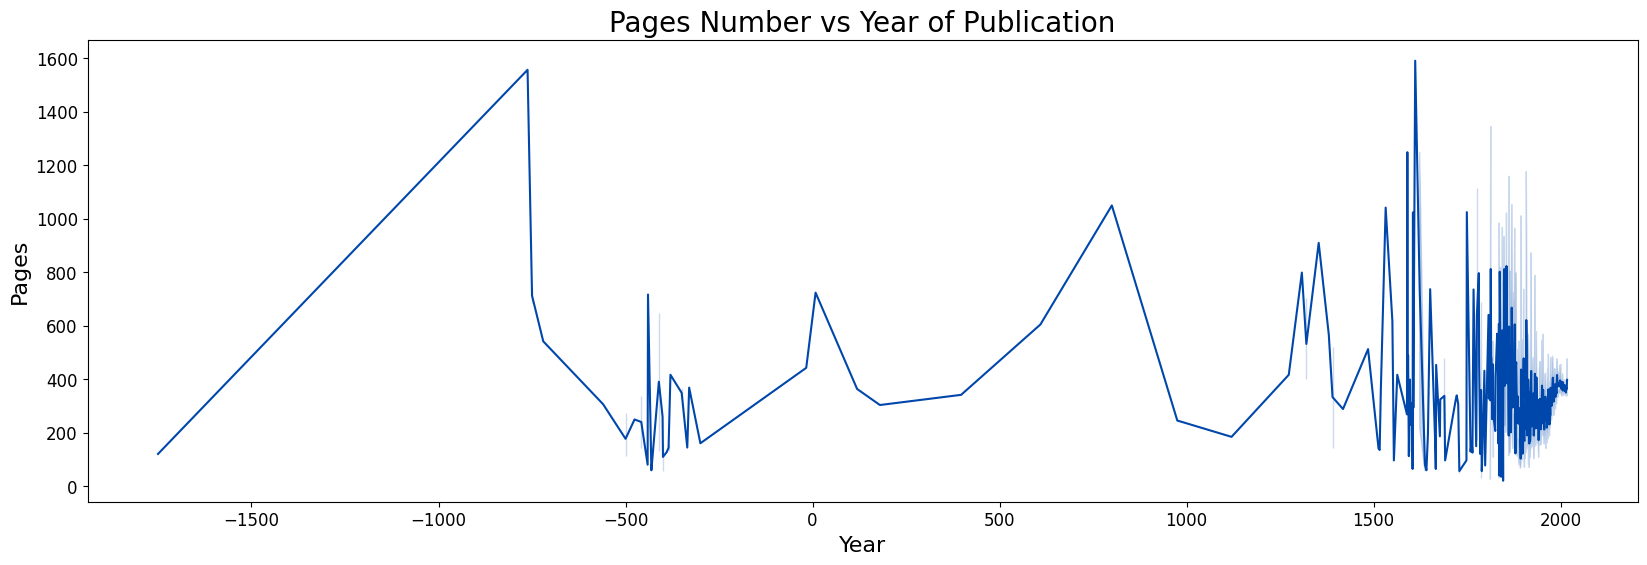

In [164]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'year', y = 'pages', data = books, color='#0047AB')
plt.title('Pages Number vs Year of Publication', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The range of year of publication is too large, therefore we need to check when the entry is more dense.

In [165]:
# Check the trend for books published after 1800
books_after_1800 = books[books['year'] > 1800]

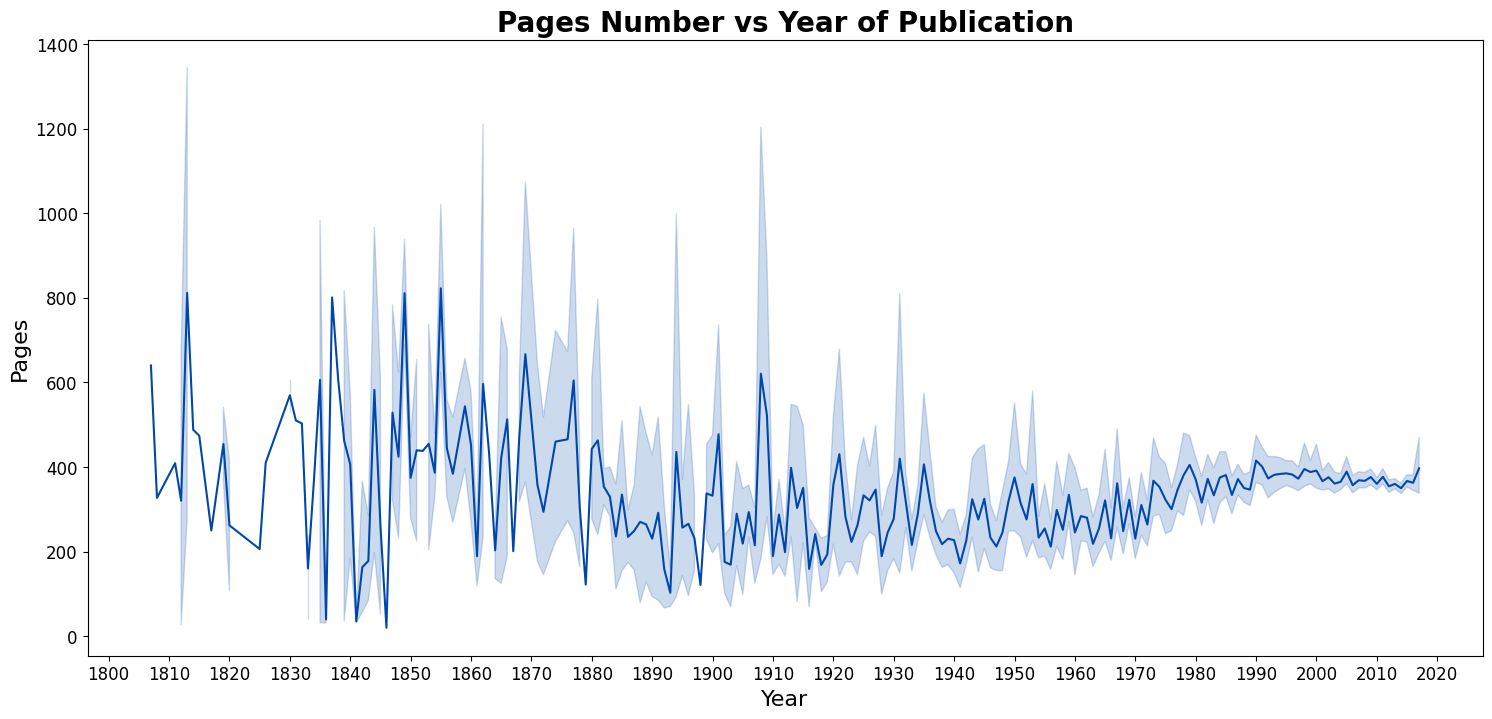

In [166]:
plt.figure(figsize = (18,8))
sns.lineplot(x = 'year', y = 'pages', data = books_after_1800, color='#0047AB')
plt.title('Pages Number vs Year of Publication', weight='bold', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(np.arange(1800, 2021, 10), fontsize=12)
plt.yticks(np.arange(0, 1401, 200), fontsize=12)
plt.show()

- Before 1900, the number of pages was randomly distributed. There are books that have more than 1000 pages but also books that have less than 100 pages. We can see that after 1900 the distribution started to stable, but it is less than 500 pages.
- After 1980, the trend also show slight increase. Most of recent books have around 400 pages.

###What genre dominates the dataset

In [167]:
#split authors in each books
g = []
books.genres.apply(lambda x: g.append(x) if ',' in x else [])
g[:5]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance']

In [168]:
#insert splitted author list in every row
genres_list = books['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

0    [youngadult, fiction, fantasy, sciencefiction,...
1             [fantasy, fiction, youngadult, classics]
2    [youngadult, fantasy, romance, fiction, parano...
3    [classics, fiction, historicalfiction, youngad...
4      [classics, fiction, historicalfiction, romance]
Name: genres, dtype: object

In [169]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

0        youngadult
0           fiction
0           fantasy
0    sciencefiction
0           romance
Name: genres, dtype: object

In [170]:
#remove previous author column and join the new splitted authors
book_genres = books.drop('genres', axis=1).join(splitted_genres)

In [171]:
x = book_genres['genres']
y = book_genres['average_rating']

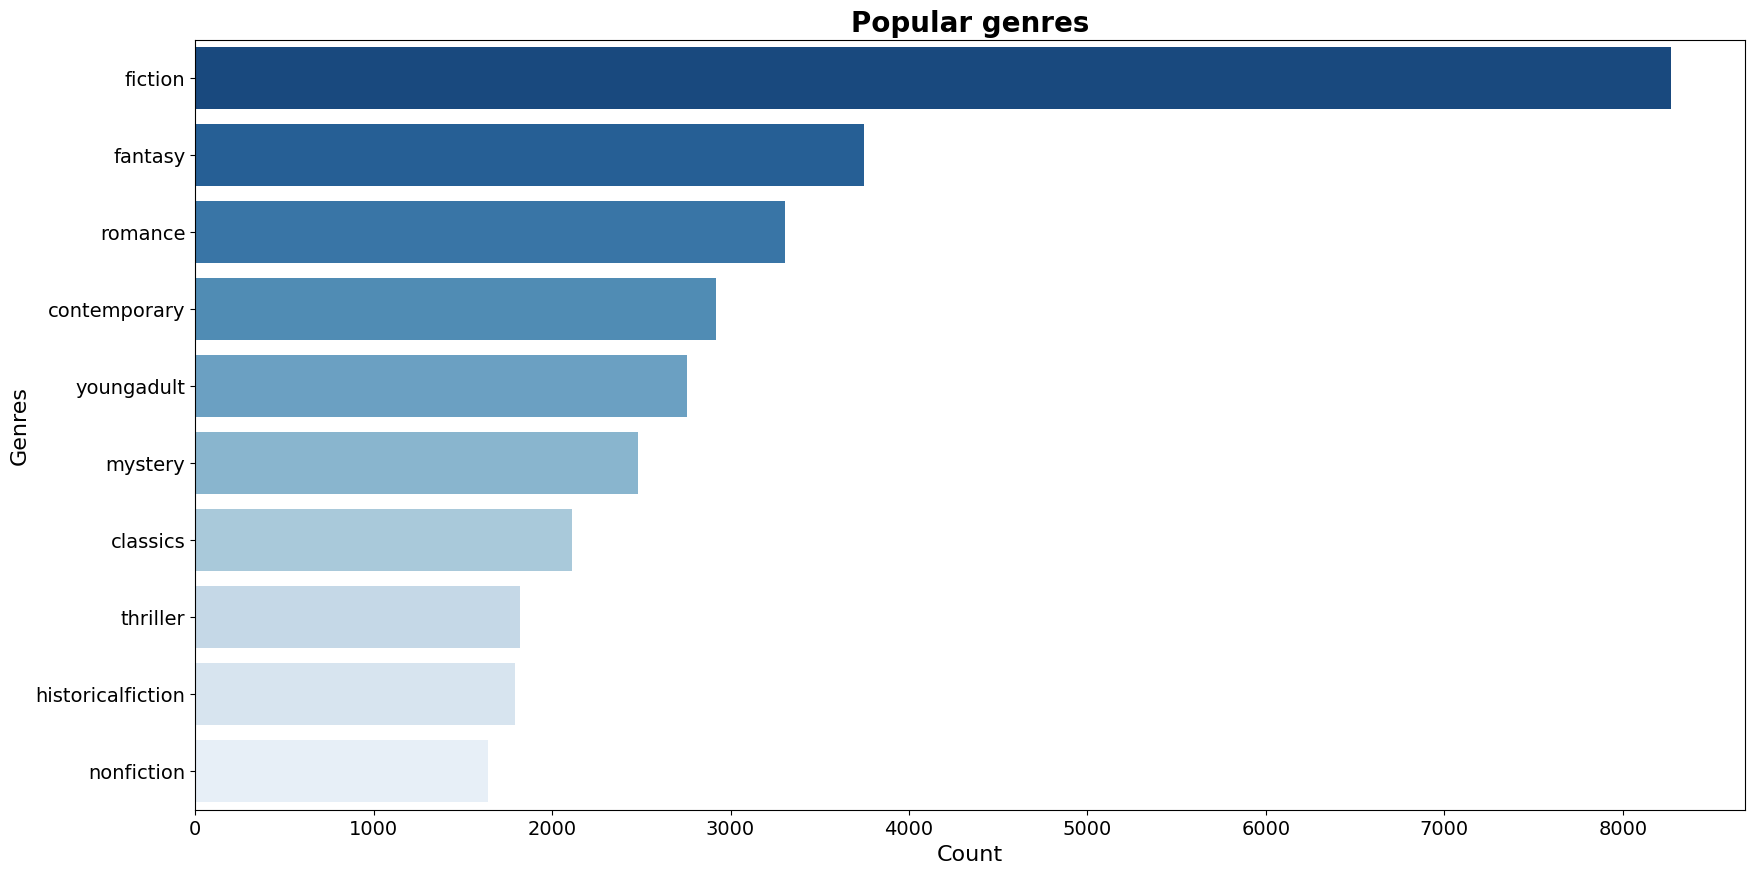

In [172]:
#rank the genre based on number of books
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can see that the majority (around 80%) of the books here are included in fiction books. The second rank goes to fantasy followed by romance. The difference between the first and second ranks is more than half. If you use a filtering method based on genre similarities, it is very unlikely that the engine will recommend non-fiction books.

###Exporting the new Dataset

In [173]:
import pandas as pd

# Assuming your DataFrame is named 'books'
# You can replace 'books' with the actual name of your DataFrame

# Check for missing values in each column
missing_values = books.isnull().sum()

# Display columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing)

# Display the total number of missing values
total_missing = missing_values.sum()
print("\nTotal number of missing values:", total_missing)


Columns with missing values:
Series([], dtype: int64)

Total number of missing values: 0


We can now store our clean data and utilize it in the book recommendation system after making some adjustments to the data.


In [174]:
import os

# Creating the 'data' directory
data_dir = 'data'
os.makedirs(data_dir, exist_ok=True)

# Save the DataFrame to a CSV file in the 'data' directory
books.to_csv(os.path.join(data_dir, 'books_cleaned.csv'), index=False)

##Importing Libraries

In [175]:
!pip install scikit-surprise


In [176]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for content based filtering
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

#for collaborative filtering
import os
import math
import random

from surprise import accuracy, Reader, Dataset, dump
from surprise import NormalPredictor, KNNBasic, SVD, SVDpp
from surprise.model_selection import cross_validate, GridSearchCV

###Collaborative Filtering


The notebook details the development and evaluation of six distinct models using Surprise:

- Normal Predictor: A baseline model providing predictions without considering user-item interactions.
- KNN (Memory-based): A memory-based model using collaborative filtering to find similar users or items.
- SVD (Model-based): A model-based approach employing Singular Value Decomposition for recommendation.
- SVD++ (Model-based): An extension of SVD, incorporating implicit feedback for enhanced recommendations.

- NMF (Non-Negative Matrix Factorization): A collaborative filtering model based on matrix factorization.

###Importing the new Dataset

In [177]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('/content/sample_data/ratings.csv')
b = pd.read_csv('/content/data/books_cleaned.csv')


In [178]:
#to have reproducible experiments
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

In [179]:
#Load the full dataset
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(r, reader)

In [180]:
#shuffle the ratings for unbiased result
all_ratings = data.raw_ratings
random.shuffle(all_ratings)



In [181]:
#split data into train and test data with the ratio 70:30
threshold = int(0.7 * len(all_ratings))
train_ratings = all_ratings[:threshold]
test_ratings = all_ratings[threshold:]

In [182]:
def book_read(user_id):
    '''Take user_id and return list of book that user has read'''
    books_list = list(b['book_id'])
    book_read_list = list(r['book_id'][r['user_id'] == user_id])
    return books_list, book_read_list

###Implementing models

###Normal Predictor

In [183]:
# prepare train data
data.raw_ratings = train_ratings

#select algorithm
npred = NormalPredictor()

In [184]:
#cross validation for train data
np_result = cross_validate(npred, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3222  1.3231  1.3213  1.3242  1.3236  1.3229  0.0011  
Fit time          2.13    2.16    2.14    2.16    2.12    2.14    0.01    
Test time         4.59    4.51    4.58    4.49    4.60    4.56    0.04    


In order to make prediction on test data, we have to retrain whole train set first.

In [185]:

#retrain whole train test
trainset = data.build_full_trainset()
npred.fit(trainset)

# Compute RMSE on trainset (without fold)
np_train_pred = npred.test(trainset.build_testset())
print('Train RMSE:')
train_rmse = accuracy.rmse(np_train_pred)

#compute RMSE on testset
testset = data.construct_testset(test_ratings)
np_test_pred = npred.test(testset)
print('Test RMSE:')
test_rmse = accuracy.rmse(np_test_pred)

Train RMSE:
RMSE: 1.3233
Test RMSE:
RMSE: 1.3236


In [186]:

dump.dump('./dump_np', np_test_pred, npred)

Now we can get recommendation for user 12874

In [187]:
data.raw_ratings = all_ratings
npred.fit(data.build_full_trainset())

In [188]:
def get_recommendation_npred(user_id, n=5):
    '''Give n recommendation to user_id'''

    all_books, user_books =  book_read(user_id)
    next_books = [book for book in all_books if book not in user_books]

    if n <= len(next_books):
        ratings = []
        for book in next_books:
            est = npred.predict(user_id, book).est
            ratings.append((book, est))
        ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
        book_ids = [id for id, rate in ratings[:n]]
        return b[b.book_id.isin(book_ids)][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]
    else:
        print('Please reduce your recommendation request')
        return

In [189]:
get_recommendation_npred(12874, 5)

,book_id,title,authors,average_rating,ratings_count
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653
5,6,The Fault in Our Stars,John Green,4.26,2346404
24,28,Lord of the Flies,William Golding,3.64,1605019
39,45,Life of Pi,Yann Martel,3.88,1003228
40,46,Water for Elephants,Sara Gruen,4.07,1068146


In [190]:
# uncomment this code to dump the calculation result for future use
dump.dump('./dump_np', np_test_pred, npred)

###K-Nearest Neighbour

These are algorithms that are directly derived from a basic nearest neighbors approach.

In [191]:
#change data to trainset
data.raw_ratings = train_ratings

#select algorithm
sim_options = {"name": "cosine",
               "user_based": False}
knn = KNNBasic(sim_options=sim_options)

In [192]:
#cross validation for train data
knn_result = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True, n_jobs = 1)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8876  0.8863  0.8869  0.8877  0.8888  0.8875  0.0008  
Fit time          21.66   24.43   24.79   24.55   25.00   24.09   1.23    
Test time         72.75   72.62   84.80   74.52   72.53   75.45   4.74    


In [193]:

# Get the column names
column_names = r.columns

# Print the column names
print("Column Names:")
for column in column_names:
    print(column)

Column Names:
user_id
book_id
rating


In [194]:
#retrain whole train test
trainset = data.build_full_trainset()
knn.fit(trainset)

# Compute RMSE on trainset (without fold)
knn_train_pred = knn.test(trainset.build_testset())
print('Train RMSE:')
train_rmse = accuracy.rmse(knn_train_pred)

#compute RMSE on testset
testset = data.construct_testset(test_ratings)
knn_test_pred = knn.test(testset)
print('Test RMSE:')
test_rmse = accuracy.rmse(knn_test_pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Train RMSE:
RMSE: 0.8001
Test RMSE:
RMSE: 0.8851


In [195]:
# uncomment this code to dump the calculation result for future use
dump.dump('./dump_knn', knn_test_pred, knn)

Now we can get recommendation for user 12874

In [196]:

data.raw_ratings = all_ratings
knn.fit(data.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [197]:
def get_recommendation_knn(user_id, n=5):
    '''Give n recommendation to user_id'''

    all_books, user_books =  book_read(user_id)
    next_books = [book for book in all_books if book not in user_books]

    if n <= len(next_books):
        ratings = []
        for book in next_books:
            est = knn.predict(user_id, book).est
            ratings.append((book, est))
        ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
        book_ids = [id for id, rate in ratings[:n]]
        return b[b.book_id.isin(book_ids)][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]
    else:
        print('Please reduce your recommendation request')
        return

In [198]:
get_recommendation_knn(12874, 5)

,book_id,title,authors,average_rating,ratings_count
27,31,The Help,Kathryn Stockett,4.45,1531753
89,98,"The Girl Who Played with Fire (Millennium, #2)",Stieg Larsson,4.22,563994
103,114,Tuesdays with Morrie,Mitch Albom,4.06,556518
118,132,The Five People You Meet in Heaven,Mitch Albom,3.90,449501
126,140,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.20,443951


###SVD - Singular Value Decomposition

SVD finds the latent factors associated with some matrix. SVD will decompose user-rating matrix into matrices that represents latent user-user features and item-item features.

In [199]:
#change data to trainset
data.raw_ratings = train_ratings

#select algorithm
svd = SVD(random_state=0)

In [200]:
#cross validation for train data
svd_result = cross_validate(svd, data, measures=["RMSE"], cv=5, verbose=True, n_jobs = 2)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8497  0.8500  0.8505  0.8498  0.8486  0.8497  0.0006  
Fit time          34.25   35.09   34.89   36.24   34.77   35.05   0.66    
Test time         6.54    6.85    6.62    6.89    6.67    6.71    0.13    


In [201]:
#retrain whole train test
trainset = data.build_full_trainset()
svd.fit(trainset)

# Compute RMSE on trainset (without fold)
svd_train_pred = svd.test(trainset.build_testset())
print('Train RMSE:')
train_rmse = accuracy.rmse(svd_train_pred)

#compute RMSE on testset
testset = data.construct_testset(test_ratings)
svd_test_pred = svd.test(testset)
print('Test RMSE:')
test_rmse = accuracy.rmse(svd_test_pred)

Train RMSE:
RMSE: 0.6441
Test RMSE:
RMSE: 0.8386


In [202]:
# uncomment this code to dump the calculation result for future use
dump.dump('./dump_svd', svd_test_pred, svd)

Now we can get recommendation for user 12874

In [203]:
data.raw_ratings = all_ratings
svd.fit(data.build_full_trainset())

In [204]:
def get_recommendation_svd(user_id, n=5):
    '''Give n recommendation to user_id'''

    all_books, user_books =  book_read(user_id)
    next_books = [book for book in all_books if book not in user_books]

    if n <= len(next_books):
        ratings = []
        for book in next_books:
            est = svd.predict(user_id, book).est
            ratings.append((book, est))
        ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
        book_ids = [id for id, rate in ratings[:n]]
        return b[b.book_id.isin(book_ids)][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]
    else:
        print('Please reduce your recommendation request')
        return

In [205]:
get_recommendation_svd(12874, 5)

,book_id,title,authors,average_rating,ratings_count
27,31,The Help,Kathryn Stockett,4.45,1531753
194,215,Ready Player One,Ernest Cline,4.31,349423
226,250,Wonder,R.J. Palacio,4.43,228538
390,425,Go Ask Alice,Beatrice Sparks,3.77,196677
1698,1808,"Morning Star (Red Rising, #3)",Pierce Brown,4.50,47736


###SVD++

The singular value decomposition (SVD)++ algorithm is employed as an optimized SVD algorithm to enhance the accuracy of prediction by generating implicit feedback.

In [206]:
#change data to trainset
data.raw_ratings = train_ratings

#select algorithm
svdpp = SVDpp(random_state=0)

In [207]:
svdpp_result = cross_validate(svdpp, data, measures=["RMSE"], cv=5, verbose=True, n_jobs = 2)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8320  0.8324  0.8315  0.8320  0.8326  0.8321  0.0004  
Fit time          348.05  349.56  347.34  348.44  345.24  347.73  1.44    
Test time         49.89   53.70   51.91   54.34   50.17   52.00   1.80    


In [208]:
#retrain whole train test
trainset = data.build_full_trainset()
svdpp.fit(trainset)

# Compute RMSE on trainset (without fold)
svdpp_train_pred = svdpp.test(trainset.build_testset())
print('Train RMSE:')
train_rmse = accuracy.rmse(svdpp_train_pred)

#compute RMSE on testset
testset = data.construct_testset(test_ratings)
svdpp_test_pred = svdpp.test(testset)
print('Test RMSE:')
test_rmse = accuracy.rmse(svdpp_test_pred)

Train RMSE:
RMSE: 0.7085
Test RMSE:
RMSE: 0.8238


In [209]:
# uncomment this code to dump the calculation result for future use
dump.dump('./dump_svdpp', svdpp_test_pred, svdpp)

Now we can get recommendation for user 12874

In [210]:
data.raw_ratings = all_ratings
svdpp.fit(data.build_full_trainset())

In [211]:
def get_recommendation_svdpp(user_id, n=5):
    '''Give n recommendation to user_id'''

    all_books, user_books =  book_read(user_id)
    next_books = [book for book in all_books if book not in user_books]

    if n <= len(next_books):
        ratings = []
        for book in next_books:
            est = svdpp.predict(user_id, book).est
            ratings.append((book, est))
        ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
        book_ids = [id for id, rate in ratings[:n]]
        return b[b.book_id.isin(book_ids)][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]
    else:
        print('Please reduce your recommendation request')
        return

In [212]:
get_recommendation_svdpp(12874, 5)

,book_id,title,authors,average_rating,ratings_count
27,31,The Help,Kathryn Stockett,4.45,1531753
597,642,"World Without End (The Kingsbridge Series, #2)",Ken Follett,4.23,128715
1243,1328,"I Am Pilgrim (Pilgrim, #1)",Terry Hayes,4.23,49740
4310,4778,The Holy Bible: English Standard Version,Anonymous,4.66,17863
5302,5990,الطنطورية,Radwa Ashour,4.32,13931


###NMF (Non-Negative Matrix Factorization)

NMF  works by decomposing the user-item interaction matrix into non-negative matrices, effectively capturing latent features and providing recommendations based on the factorized representations.

In [213]:
from surprise import NMF

# Change data to trainset
data.raw_ratings = train_ratings



In [214]:
# Select algorithm (NMF in this case)
nmf_model = NMF(random_state=0)

# Cross-validate on the train data
nmf_result = cross_validate(nmf_model, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

# Retrain on the whole train set
trainset = data.build_full_trainset()
nmf_model.fit(trainset)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8707  0.8709  0.8706  0.8704  0.8714  0.8708  0.0004  
Fit time          43.70   44.76   43.31   44.83   43.71   44.06   0.62    
Test time         5.73    6.04    5.73    5.96    5.74    5.84    0.13    


In [215]:

# Define and train the NMF model
nmf_model = NMF()
nmf_model.fit(trainset)


In [216]:
# Generate predictions on the test set
nmf_test_pred = nmf_model.test(testset)

In [217]:
# Function to get recommendations using NMF
def get_recommendation_nmf(user_id, n=5):
    '''Give n recommendation to user_id'''

    all_books, user_books =  book_read(user_id)
    next_books = [book for book in all_books if book not in user_books]

    if n <= len(next_books):
        ratings = []
        for book in next_books:
            # Use NMF to predict ratings
            est = nmf_model.predict(user_id, book).est
            ratings.append((book, est))
        ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
        book_ids = [id for id, rate in ratings[:n]]
        return b[b.book_id.isin(book_ids)][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]
    else:
        print('Please reduce your recommendation request')
        return

In [218]:
# Uncomment this code to dump the calculation result for future use
dump.dump('./dump_nmf', nmf_test_pred, nmf_model)


Now we can get recommendation for user 12874

In [219]:
get_recommendation_nmf(12874, 5)

,book_id,title,authors,average_rating,ratings_count
3353,3628,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900
4068,4483,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351
4670,5207,The Days Are Just Packed: A Calvin and Hobbes ...,Bill Watterson,4.68,19143
6024,6920,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597
7466,8946,The Divan,Hafez,4.63,2773


###Evaluation

In [220]:
#uncomment this code to load the dump file
np_test_pred, npred = dump.load('./dump_np')
knn_test_pred, knn = dump.load('./dump_knn')
svd_test_pred, svd = dump.load('./dump_svd')
svdpp_test_pred, svdpp = dump.load('./dump_svdpp')
nmf_test_pred, nmf = dump.load('./dump_nmf')

In [221]:
#making the calculation reult into dataframe
df_np = pd.DataFrame(np_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_knn = pd.DataFrame(knn_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_svd = pd.DataFrame(svd_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_svdpp = pd.DataFrame(svdpp_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_nmf = pd.DataFrame(nmf_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])

#### Comparing RMSE, Duration and Memory Use


In [222]:
import pandas as pd

# Existing data
data = [['NP', 1.3236, '3m 40s', 8.7],
        ['KNN', 0.8851, '24m 45s', 16],
        ['SVD', 0.8386, '7m 5s', 8.8],
        ['SVD++', 0.8238, '1h 9m 50s', 8.4]]

# NMF results
nmf_results = [0.8708, '43.47s', '6.36']

# Create DataFrame
columns = ['Model', 'RMSE', 'Duration', 'Memory Use']
df = pd.DataFrame(data, columns=columns)

# Add NMF results to the DataFrame
df = df.append({'Model': 'NMF', 'RMSE': nmf_results[0], 'Duration': nmf_results[1], 'Memory Use': nmf_results[2]}, ignore_index=True)

# Display the updated DataFrame
print(df)




   Model  RMSE   Duration Memory Use
0     NP  1.32     3m 40s       8.70
1    KNN  0.89    24m 45s      16.00
2    SVD  0.84      7m 5s       8.80
3  SVD++  0.82  1h 9m 50s       8.40
4    NMF  0.87     43.47s       6.36


By comparing the metric evaluation of four model, we get the lowest RMSE in SVD++. However, although SVD++ shows lower RMSE results, it takes a very long time to do the calculations. If we look at the rating predictions, the distribution of ratings on SVD and SVD++ is not much different.

K-nearest neighbor (KNN) needs a lot of memory, since the recommendation systems rely on storing a sizable dataset of items and their properties in order to create suggestions. When a new item is added or a recommendation is needed, the KNN method must scan the entire dataset to discover the closest neighbors, which can be computationally intensive and demand a lot of memory.

###Comparing Prediction Distribution

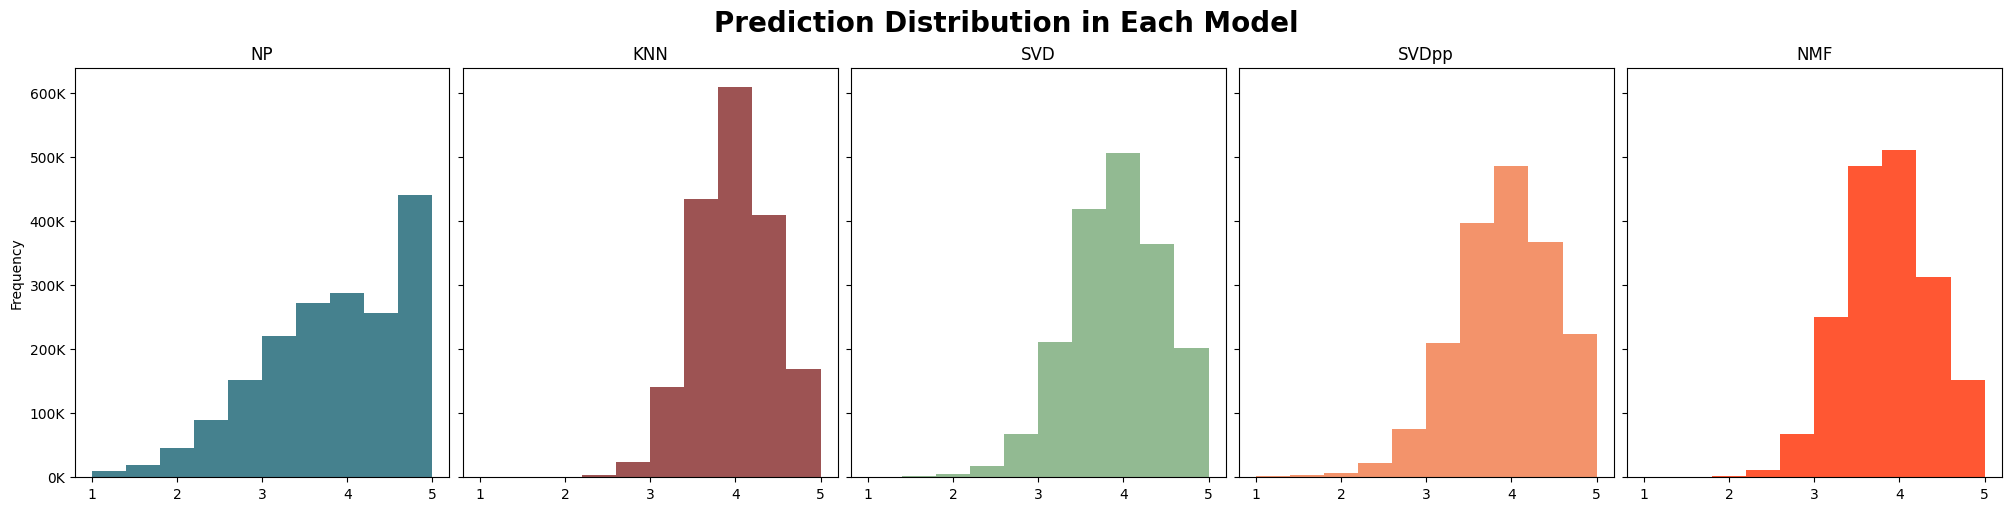

In [223]:
# Counting the number of predictions for each rating value
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,  figsize=(20, 5), sharey=True, constrained_layout=True)

df_np.est.plot(kind='hist', title='NP', ax=ax1, color='#45818E')
df_knn.est.plot(kind='hist', title='KNN', ax=ax2, color='#9D5353')
df_svd.est.plot(kind='hist', title='SVD', ax=ax3, color='#92BA92')
df_svdpp.est.plot(kind='hist', title='SVDpp', ax=ax4, color='#F3936B')
df_nmf.est.plot(kind='hist', title='NMF', ax=ax5, color='#FF5733')  # Add NMF

current_values = plt.gca().get_yticks() / 1000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in current_values])
plt.suptitle('Prediction Distribution in Each Model', weight='bold', fontsize=20)
plt.show()



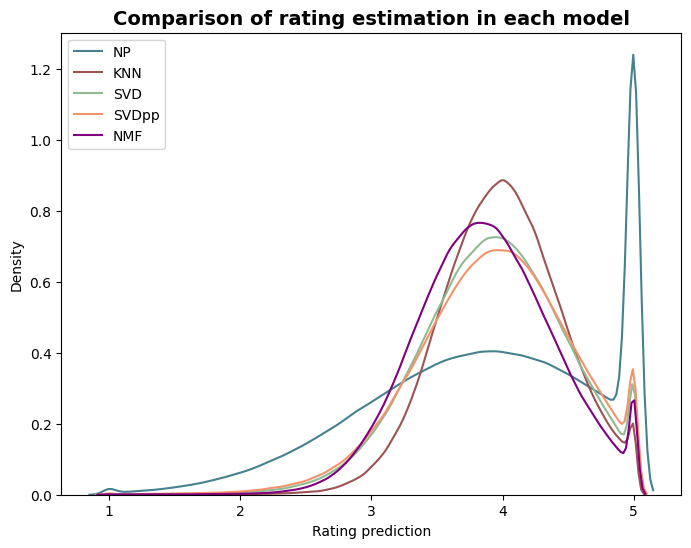

In [224]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(df_np['est'], shade=False, color='#45818E', label = 'NP', ax=ax)
sns.kdeplot(df_knn['est'], shade=False, color='#9D5353', label = 'KNN', ax=ax)
sns.kdeplot(df_svd['est'], shade=False, color='#92BA92', label = 'SVD', ax=ax)
sns.kdeplot(df_svdpp['est'], shade=False, color='#F3936B', label = 'SVDpp', ax=ax)
sns.kdeplot(df_nmf['est'], shade=False, color='#800080', label = 'NMF', ax=ax)
ax.legend()
plt.xlabel('Rating prediction')
plt.ylabel('Density')
plt.title('Comparison of rating estimation in each model', weight='bold', fontsize=14)
plt.show()



 Normal Predictor model predicts higher ratings more often, meanwhile KNN predictions are concentrated around the mean. For SVD, SVD++ and NMF the ratings are more fairly distributed.

##2. Content Based Recommendation System

###a. Recommendation based on Cosine Similarity

To personalise our recommendations, we will measure the cosine similarity between books. The steps are:

1. Make new column which consist of authors, title, genres and description of each book. <br>
2. Use `TFIDFVectorizer` to convert our data to vector
3. Calculate the cosine similarity score for all books
4. User will input their favorite book, we will sort book that more similar to the input
5. Recommend a user books

Since we use `TFIDFVectorizer`, the dot product will directly give us the cosine similarity score. Therefore, we will use `sklearn`'s `linear_kernel` instead of `cosine_similarities` since it is much faster.

In [225]:
def content(books):
    books['content'] = (pd.Series(books[['authors', 'title', 'genres', 'description']]
                                  .fillna('')
                                  .values.tolist()
                                  ).str.join(' '))

    tf_content = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
    tfidf_matrix = tf_content.fit_transform(books['content'])
    cosine = linear_kernel(tfidf_matrix, tfidf_matrix)
    index = pd.Series(books.index, index=books['title'])

    return cosine, index

In [226]:
def content_recommendation(books, title, n=5):
    cosine_sim, indices = content(books)
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n + 1]
    book_indices = [i[0] for i in sim_scores]
    return books[['book_id', 'title', 'authors', 'average_rating', 'ratings_count']].iloc[book_indices]

In [227]:
content_recommendation(b, '1984')

,book_id,title,authors,average_rating,ratings_count
795,846,Animal Farm / 1984,George Orwell,4.26,116197
2048,2187,We,Yevgeny Zamyatin,3.95,40020
3670,4004,Homage to Catalonia,George Orwell,4.14,22227
6857,8056,"1Q84 #1-2 (1Q84, #1-2)",Haruki Murakami,4.07,8342
4915,5510,The Far Side Gallery,Gary Larson,4.42,20022


Notice that the system recommends a book with average_rating (3.95) lower than average and book with low ratings_count (8342). We will try to improve our recommendation by adding popularity-rating filter.

###b. Content Based + Popularity-Rating Filter

The mechanism to remove books with low ratings has been added on top of the content based filtering. This system will return books that are similar to the input, are popular and have high ratings. However, in this filter, our cutoff will be the quantile 75. In order for a book to appear in the recommendation, it must be ranked in top 25 similar and receive at least 75% weight score of the other books on the list (around 800 ratings).

In [228]:
def improved_recommendation(books, title, n=5):
    cosine_sim, indices = content(books)
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    book_indices = [i[0] for i in sim_scores]
    books2 = books.iloc[book_indices][['book_id', 'title', 'authors', 'average_rating', 'ratings_count']]

    v = books2['ratings_count']
    m = books2['ratings_count'].quantile(0.75) #here the minimum rating is quantile 75
    R = books2['average_rating']
    C = books2['average_rating'].median()
    books2['new_score'] = (v/(v+m) * R) + (m/(m+v) * C)

    high_rating = books2[books2['ratings_count'] >= m]
    high_rating = high_rating.sort_values('new_score', ascending=False)

    return high_rating[['book_id', 'title', 'authors', 'average_rating', 'ratings_count','new_score']].head(n)

In [229]:

improved_recommendation(b, '1984')

,book_id,title,authors,average_rating,ratings_count,new_score
795,846,Animal Farm / 1984,George Orwell,4.26,116197,4.20
759,809,Brave New World / Brave New World Revisited,Aldous Huxley,4.16,108124,4.13
1044,1120,Aesop's Fables,Aesop,4.05,88508,4.05
8316,2375,"Tinker, Tailor, Soldier, Spy",John le Carré,4.04,40871,4.04
604,649,1Q84,Haruki Murakami,3.89,125195,3.93


This method is suitable for people who are looking for similar books, but this system can not capture tastes and provide recommendations across genres. Therefore, we will try to build a recommendation system using Collaborative filtering.

###Conclusion:

###1- Collaboration Filtering

I built a recommender with 5 algorithms: Normal Predictor, KNN, SVD, and SVD++ and NMF.



1. **RMSE (Root Mean Square Error):**
   - Lower RMSE values indicate better predictive performance.
   - SVD++ has the lowest RMSE (0.82), suggesting it performs the best in terms of accuracy.

2. **Duration:**
   - Lower duration values are generally preferable as they indicate faster model training.
   - NMF has the lowest training duration (43.47s), indicating it is the fastest to train.

3. **Memory Use:**
   - Lower memory usage is usually desirable, as it allows for more efficient resource utilization.
   - NMF has the lowest memory usage (6.36), suggesting it is the most memory-efficient.

Based on specific priorities:

- If accuracy is the top priority, SVD++ with the lowest RMSE might be the best choice.
- If training speed is crucial, NMF with the lowest duration might be preferable.
- If memory efficiency is a key consideration, NMF with the lowest memory use would be a good option.

It's important to strike a balance between these factors depending on your specific requirements and constraints. Consider the trade-offs and choose the model that aligns best with your goals for the book recommendation system.

To strike a balance between accuracy, training speed, and memory efficiency, we might consider SVD (Singular Value Decomposition) as the best model.

1. **Reasonable RMSE:** While SVD++ has the lowest RMSE, SVD also has a good RMSE of 0.84. It strikes a balance between accuracy and computational efficiency.

2. **Moderate Training Duration:** SVD has a reasonable training duration of 7 minutes and 5 seconds. It's faster than SVD++, making it a good compromise in terms of training speed.

3. **Moderate Memory Use:** With a memory use of 8.80, SVD's memory consumption is reasonable, indicating a balanced use of resources.

Considering these factors, SVD seems to offer a good compromise between accuracy, training speed, and memory efficiency.

###2- Content based filtering
Recommendations based on title, authors, description, and genre using cosine similarity have been made. To provide a balance of book recommendations, an additional popularity-rating filter has been added. This method is suitable for people who are looking for books that are similar to their favorite books, but this system cannot capture tastes and provide recommendations across genres. By applying a content based model, instead of having to rate 30 books to start the recommendation engine, users can just pick one book they liked for Goodreads to provide good recommendations for new users, making the process easier.